<div style="text-align: left">
    <img src="../../_static/xcdat-logo.png" alt="xCDAT logo" style="display: inline-block; width:600px;">
    <div style="text-align: left">
    <h3><img src="images/scipy-logo.png" alt="SciPy logo" style="display: inline-block; width:50px; margin-right:10px">SciPy 2024, 07/11/2024</h3>
    </div>
    <h1>Xarray Climate Data Analysis Tools</h1>
    <h3 style="font-style:italic">
        A Python Package for Simple and Robust Analysis of Climate Data
    </h3>
    <h3>
        Core Developers: Tom Vo, Stephen Po-Chedley, Jason Boutte, Jill Zhang, Jiwoo Lee
    </h3>
    <p>With thanks to Peter Gleckler, Paul Durack, Karl Taylor, and Chris Golaz</p>
</div>

---

<p style="text-align: left; font-size: 12px">This work is performed under the auspices of the U. S. DOE by Lawrence Livermore National Laboratory under contract No. DE-AC52-07NA27344.</p>


## Notebook Setup

Create an Anaconda environment for this notebook using the command below:

```bash
conda create -n xcdat_scipy_2024 -c conda-forge xcdat=0.7.0 nco matplotlib ipython ipykernel cartopy nc-time-axis gsw-xarray jupyter jupyter_contrib_nbextensions rise wget

conda activate xcdat_scipy_2024
```

Then run:

```bash
jupyter contrib nbextension install --user

jupyter nbextension enable splitcell/splitcell
```

To open Jupyter Notebook GUI:

```bash
jupyter notebook
```

To print notebook as PDF:

```bash
jupyter nbconvert —-to html <PATH-TO-NOTEBOOK>
# Then "Print HTML to PDF" in your browser
```


## An Overview of this Talk

1. Preliminary introduction to Xarray
2. Brief history, scope, and mission of xCDAT
3. Design philosophy and key features
4. Technical demo: end-to-end analysis workflow
5. High-level parallelization with Dask
6. xCDAT’s community and how to get involved


<div style="text-align: left; margin-top:10px">
<img src="../../_static/xarray-logo.png" alt="Xarray logo" align=\"center\" style="display: inline-block; width:300px;">

<h3>"N-D labeled arrays and datasets in Python"</h3>
</div>

- An evolution of an internal tool developed at The Climate Corporation.
- Released as open source in May 2014
- NumFocus fiscally sponsored project since August 2018
- Based on NumPy, heavily inspired by Pandas

<div style="text-align: center;">
  <img src="../../_static/NumFocus-logo.png" alt="NumFocus logo" align=\"center\" style="display: inline-block; width:200px;">
  <img src="../../_static/numpy-logo.svg" alt="NumPy logo" align=\"center\" style="display: inline-block; width:200px;">
  <img src="../../_static/pandas-logo.svg" alt="Pandas logo" align=\"center\" style="display: inline-block; width:200px;">
</div>


**Why Xarray?**

- Introduces labels in the form of dimensions, coordinates, and attributes on top of raw NumPy-like arrays
- Intuitive, more concise, and less error-prone user experience

**Key features include:**

- File I/O, indexing and selecting, interpolating, grouping, aggregating, parallelism (Dask), plotting (matplotlib wrapper)
  Supports various file formats netCDF, Iris, OPeNDAP, Zarr, and more
- Interoperability with scientific Python ecosystem such as NumPy, Dask, Pandas, and Matplotlib

<div style="text-align: center;">
  <img src="../../_static/dask-logo.svg" alt="NumFocus logo" align=\"center\" style="display: inline-block; width:200px;">
  <img src="../../_static/matplotlib-logo.svg" alt="NumPy logo" align=\"center\" style="display: inline-block; width:200px;">
</div>


<div style="text-align: left; margin-top:10px">
<img src="../../_static/xcdat-logo.png" alt="xCDAT logo" align=\"center\" style="display: inline-block; width:300px;">
<h4>Xarray Climate Data Analysis Tools for Structured Grid Analysis</h4>
</div>

- Collaboration between:

<div style="text-align: center; margin-top:10px">
    <img src="../../_static/e3sm-logo.jpg" alt="E3SM logo" align=\"center\" style="display: inline-block;     margin-right:50px; width:200px;">
    <img src="../../_static/pcmdi-logo.png" alt="PCMDI logo" style="display: inline-block; margin-right:50px; width:200px;">
    <img src="../../_static/seats-logo.png" alt="SEATS logo" style="display: inline-block; width:200px">
</div>

- xCDAT is an extension of Xarray for climate data analysis on structured grids, a modern successor to the Community Data Analysis Tools (CDAT) library
- Scope is focused on routine climate research analysis operations such as loading, wrangling, averaging, and regridding data
- Aims to provide features and utilities for simple and robust analysis of climate data


<div style="text-align: left; margin-top:10px">
    <h3>xCDAT features and utilities for simple, robust, and less error-prone analysis code</h3>
</div>

- Extension of `xr.open_dataset()` and `xr.open_mfdataset()` with post-processing options
- Generate missing bounds, center time coords, convert lon axis orientation
- Geospatial weighted averaging
- Temporal averaging, climatologies, departures
- Horizontal structured regridding (extension of xESMF and Python port of regrid2)
- Vertical structured regridding (extension of xGCM)

<div style="text-align: center; margin-top:10px">
    <img src="../../_static/xarray-logo.png" alt="Xarray logo" style="display: inline-block; width:300px; margin-right:50px">
    <img src="../../_static/esmf-logo.png" alt="ESMF logo" style="display: inline-block; margin-right:50px; width:300px;">
    <img src="../../_static/xgcm-logo.png" alt="xGCM logo" align=\"center\" style="display: inline-block;     margin-right:50px; width:300px;">
</div>

<div style="text-align: center;">
    <img src="../../_static/thumbnails/spatial-avg.png" alt="Spatial average chart" style="display: inline-block; width:250px; margin-right:50px">
    <img src="../../_static/thumbnails/temporal-average.png" alt="Temporal average chart" style="display: inline-block; margin-right:50px; width:250px;">
    <img src="../../_static/thumbnails/regridding-vertical.png" alt="Vertical regridding chart" style="display: inline-block; margin-right:50px; width:250px;">
</div>


<div style="text-align: left; margin-top:10px">
<h3>The Software Design Philosophy of xCDAT</h3>
</div>

- Intentionality designed to **encourage software sustainability** and **reproducible science**
- **Well-documented and configurable features** allow scientists to rapidly develop robust, reusable, less-error prone, more maintainable code
- **Streamline the developer experience** of writing analysis code by reducing complexity
- xCDAT aims to contribute to **Pangeo's** effort to foster an ecosystem of mutually compatible geoscience Python packages

<div style="text-align: center; margin-top:10px">
    <img src="../../_static/pangeo-logo.png" alt="Pangeo logo" align=\"center\" style="display: inline-block; width:300px; margin-right:50px">
    <img src="../../demos/1-25-23-cwss-seminar/images/rtd-logo.png" alt="PCMDI logo" style="display: inline-block; width:300px;">
</div>


### Getting Started with xCDAT

- xCDAT is available for installation through Anaconda on the `conda-forge` channel
  - Install command: `conda install -c conda-forge xcdat`
- Check out xCDAT’s Read the Docs, which we strive to keep up-to-date
  - https://xcdat.readthedocs.io/en/stable/

<div style="text-align: center;">
    <img src="../../demos/1-25-23-cwss-seminar/images/anaconda-logo.png" alt="Anaconda logo" align=\"center\" style="display: inline-block; margin-right:50px; width:300px;">
    <img src="../../demos/1-25-23-cwss-seminar/images/conda-forge-logo.png" alt="Conda Forge logo" style="display: inline-block; margin-right:50px; width:300px;">
</div>

<div style="text-align: center; margin-top:10px">
  <img src="../../demos/1-25-23-cwss-seminar/images/rtd-logo.png" alt="Read the docs logo" style="display: inline-block; width:300px; margin-right:50px">
  <img src="../../demos/1-25-23-cwss-seminar/images/rtd-screenshot.png" alt="xCDAT docs" style="display: inline-block; width:300px">
</div>


### How to use xCDAT

- xCDAT extends Xarray Dataset objects via "accessor" classes.

<div style="text-align: center;">
    <img src="../../_static/accessor_api.svg
" alt="Anaconda logo" align=\"center\" style="display: inline-block; margin-right:50px; width:900px;">
      <figcaption style="text_align:center; font-style: italic; font-size: 14px;">In the example above, custom spatial functionality is exposed by chaining the `spatial` accessor attribute to the Dataset object. This chaining enables access to the underlying `spatial.average()` method.</figcaption>
</div>

- `spatial`
  - `.average()`, `.get_weights()`
- `temporal`
  - `.average()`, `.group_average()`, `.climatology()`, `.depatures()`
- `bounds`
  - `.get_bounds()`, `.add_bounds()`, `.add_missing_bounds()`


xCDAT also provides general utilities as Python functions

- `open_dataset()`, `open_mfdataset()`
- `center_times()`, `decode_time()`
- `swap_lon_axis()`
- `create_axis()`
- `create_grid()`
- `get_dim_coords()`
- `get_dim_keys()`

Visit the API Reference page for a complete list: https://xcdat.readthedocs.io/en/latest/api.html


## End-to-End Analysis and Visualization of E3SM Data using NCO and xCDAT

### Overview

This exercise will walkthrough using regridding E3SM data to a
rectilinear grid using `ncremap`, then performing analysis and visualization using `xcdat`.

### Sections

1. Setup Code
2. Use NCO to regrid E3SM data to a rectilinear grid
3. I/O
4. Horizontal Regridding
5. Vertical Regridding
6. Spatial Averaging
7. Temporal Computations
8. General Dataset Utilities


### 1. Setup Code


In [1]:
# This style import is necessary to properly render Xarray's HTML output with
# the Jupyer RISE extension.
# GitHub Issue: https://github.com/damianavila/RISE/issues/594
# Source: https://github.com/smartass101/xarray-pydata-prague-2020/blob/main/rise.css

from IPython.core.display import HTML

style = """
<style>
.reveal pre.xr-text-repr-fallback {
    display: none;
}
.reveal ul.xr-sections {
    display: grid
}

.reveal ul ul.xr-var-list {
    display: contents
}
</style>
"""


HTML(style)

In [2]:
import glob

import numpy as np
from xarray.coding.calendar_ops import _datetime_to_decimal_year as dt2decimal
import xcdat as xc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

### 2. Use NCO to regrid E3SM data to a rectilinear grid


#### Download the E3SM map file.


In [ ]:
%%bash
# Create the directories to store the raw data and remapped data.
# ---------------------------------------------------------------
mkdir v2.LR.historical_0101.eam.h0.1850-1853
mkdir -p remapped

# Download the map file.
# ----------------------
curl -O https://web.lcrc.anl.gov/public/e3sm/diagnostics/maps/map_ne30pg2_to_cmip6_180x360_aave.20200201.nc
mv map_ne30pg2_to_cmip6_180x360_aave.20200201.nc remapped

#### Run the ESGF wget script to download the data.

- Source: https://aims2.llnl.gov/search?project=E3SM&activeFacets=%7B%22model_version%22%3A%222_0%22%2C%22realm%22%3A%22atmos%22%2C%22time_frequency%22%3A%22mon%22%2C%22ensemble_member%22%3A%22ens1%22%7D

- Note, the three years (1850-1853) of E3SM v2 LR historical atmosphere data will be downloaded,
  which is around 20 GB.


In [ ]:
%%bash

bash ./docs/demos/24-07-11-scipy-2024/wget_script_2024-6-12_13-17-40.sh -s >/dev/null 2>&1

mv v2.LR.historical_0101.eam.h0.*nc v2.LR.historical_0101.eam.h0.1850-1853/

#### Now call ncremap to regrid the file to a 0.5 x 0.5 degree grid.

- Run `ncremap` on a directory of files (using a wildcard to filter for `.h0` files, which include monthly output we’d like to analyze).
- We will then move the remapped files to a `remapped/` directory.


In [3]:
%%bash

# Perform regridding.
# -------------------
# format: ncremap -m REMAPFILE.nc -t 1 -v VAR_OF_INTEREST /PATH/TO/DATA/*nc
# Subsetting files for "h0", which is the monthly history field.
ncremap -m remapped/map_ne30pg2_to_cmip6_180x360_aave.20200201.nc -t 1 -v TREFHT v2.LR.historical_0101.eam.h0.1850-1853/v2.LR.historical_0101.eam.h0.*nc >/dev/null 2>&1

# Move output to remapped directory.
# ----------------------------------
mv v2.LR.historical_0101.eam.h0.*nc remapped/

### 3. I/O


#### Now let's load in the regridded data and use xcdat to perform additional calculations on the 0.5 x 0.5 degree grid


- We will be analyzing a few years of temperature (`TREFHT`) data from E3SM v2 NARRM.
- Use `xc.open_mfdataset()` to open all the remapped netcdf files in a single `xr.Dataset` object.
- `xcdat` will add missing bounds and handles some additional time axes.
- API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xcdat.open_mfdataset.html


In [4]:
ds = xc.open_mfdataset("remapped/v2.LR.historical_0101.eam.h0.*.nc")
ds

<xarray.Dataset> Size: 13MB
Dimensions:    (lat: 180, nbnd: 2, lon: 360, time: 48)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 384B 1850-02-01 00:00:00 ... 1854-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    lat_bnds   (lat, nbnd) float64 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, nbnd) float64 6kB dask.array<chunksize=(360, 2), meta=np.ndarray>
    gw         (lat) float64 1kB dask.array<chunksize=(180,), meta=np.ndarray>
    area       (lat, lon) float64 518kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    TREFHT     (time, lat, lon) float32 12MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    time_bnds  (time, nbnd) object 768B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/25)
    ne:                30
    fv_nphys:          2
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         32655baa1f
    product:           model-output
    ...                ...
    remap_script:      ncremap
    remap_hostname:    ml-5556678
    remap_version:     5.2.4
    NCO:               netCDF Operators version 5.2.4 (Homepage = http://nco....
    map_file:          remapped/map_ne30pg2_to_cmip6_180x360_aave.20200201.nc
    input_file:        v2.LR.historical_0101.eam.h0.1850-1853/v2.LR.historica...

#### ...but checkout the time coordinate:


In [5]:
ds.time.values[0:3]

array([cftime.DatetimeNoLeap(1850, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 4, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)

The monthly time coordinates begin in 1850-02-01, even though our first file is for 1850-01-01. This is because E3SM saves out monthly history at midnight at the end of the month.


xCDAT can center the time coordinates between the monthly time bounds either by:

1. Passing `center_times=True` to `xc.open_mfdataset()` (demonstrated below)
2. Passing the `xr.Dataset` to `xc.center_times()`


In [6]:
ds = xc.open_mfdataset("remapped/v2.LR.historical_0101.eam.h0.*.nc", center_times=True)
ds.time.values[0:3]

array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)

### 4. Horizonal Regridding

We often want to regrid a dataset to a new grid to facilitate data analysis or comparisons with other datasets. The current dataset is at 0.5 x 0.5<sup>o</sup> resolution, so we'll start be remapping it to a 4 x 4<sup>o</sup> grid.


#### First, we specify the target grid


In [7]:
# create target axes
nlat = xc.create_axis(
    "lat", np.arange(-88, 90, 4), attrs={"units": "degrees_north", "axis": "Y"}
)
nlon = xc.create_axis(
    "lon", np.arange(2, 360, 4), attrs={"units": "degrees_east", "axis": "X"}
)

#### Create the target grid using the target axes and bounds.

- API Documentation: https://xcdat.readthedocs.io/en/latest/generated/xcdat.create_grid.html#xcdat.create_grid


In [8]:
ngrid = xc.create_grid(x=nlon, y=nlat)

#### Call the xESMF regridder

Here we're using bilinear regridding, but other methods may be appropriate (e.g., you may want to use "conservative_normed" for fields that should be conserved globally).

- Regrid "TREFHT" with the `ngrid` created above using `xesmf` and `bilinear`.
- API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xarray.Dataset.regridder.horizontal.html


In [9]:
ds_xesmf = ds.regridder.horizontal("TREFHT", ngrid, tool="xesmf", method="bilinear")

#### Compare the results (for the first timestep)

Now we just plot the results for comparison.


Text(0.5, 1.0, 'xESMF 4$^{\\circ}$ x 4$^{\\circ}$')

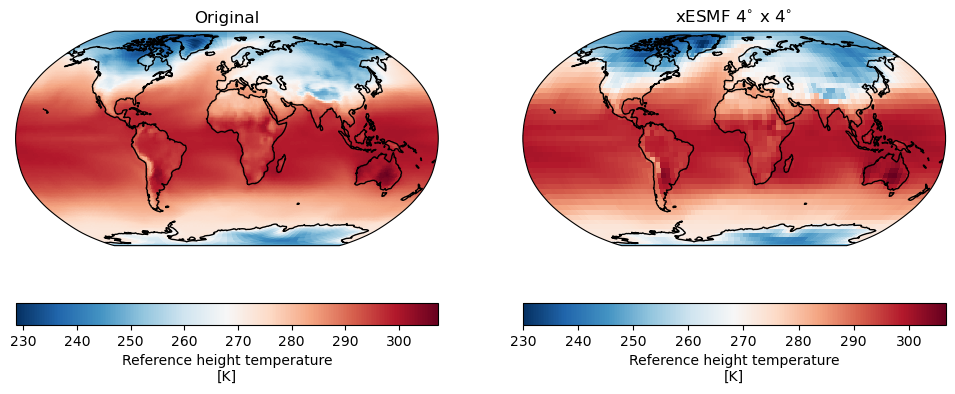

In [10]:
map_proj = ccrs.Robinson()

# plot original data (first time step)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1, projection=map_proj)
p = ds.TREFHT[0].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    cbar_kwargs={"orientation": "horizontal"},
    cmap=plt.cm.RdBu_r,
)
ax = plt.gca()
ax.coastlines()
plt.title("Original")

# plot the remapped data (first time step)
plt.subplot(1, 2, 2, projection=map_proj)
p = ds_xesmf.TREFHT[0].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    cbar_kwargs={"orientation": "horizontal"},
    cmap=plt.cm.RdBu_r,
)
ax = plt.gca()
ax.coastlines()
plt.title("xESMF 4$^{\circ}$ x 4$^{\circ}$")

### 5. Vertical Regridding

xCDAT can also regrid in the vertical dimension. Here we'll grab some 3D temperature data and regrid it in the vertical. First, we need to remap some 3-dimensional data to a rectilinear grid (like we did for the surface air temperature data, `TREFHT`).


In [11]:
%%bash

# Remap (we are only remapping one file and specifying the output location)
ncremap -m remapped/map_ne30pg2_to_cmip6_180x360_aave.20200201.nc -t 1 -v T v2.LR.historical_0101.eam.h0.1850-1853/v2.LR.historical_0101.eam.h0.1850-01.nc T_v2.LR.historical_0101.eam.h0.1850-01.nc >/dev/null 2>&1

#### Now let's load the data:


In [12]:
# specify file we just regridded
fn = "T_v2.LR.historical_0101.eam.h0.1850-01.nc"

# load regridded data
ds3d = xc.open_dataset(fn)

#### Next, we will do the vertical remapping...


In [13]:
# first construct the 3D pressure field
pressure = ds3d["hyam"] * 1000.0 + ds3d["hybm"] * ds3d["PS"]

# next, construct the target pressure axis
target_plevs = [
    100000,
    92500,
    85000,
    75000,
    70000,
    60000,
    50000,
    40000,
    30000,
    25000,
    20000,
    15000,
    10000,
    7000,
    5000,
    3000,
    1000,
    500,
    300,
    100,
]
nplev = xc.create_grid(z=xc.create_axis("lev", target_plevs))

#### Regrid the `"T"` variable using `nplev` as the output grid, `"log"` method, and `pressure` as the target data.

- Example Documentation: https://xcdat.readthedocs.io/en/stable/examples/regridding-vertical.html#4:-Remap-cloud-fraction-from-model-hybrid-coordinate-to-pressure-levels


In [14]:
dsvr = ds3d.regridder.vertical("T", nplev, method="log", target_data=pressure)

/opt/miniconda3/envs/xcdat_scipy_2024/lib/python3.11/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(


#### Finally, we plot the result:


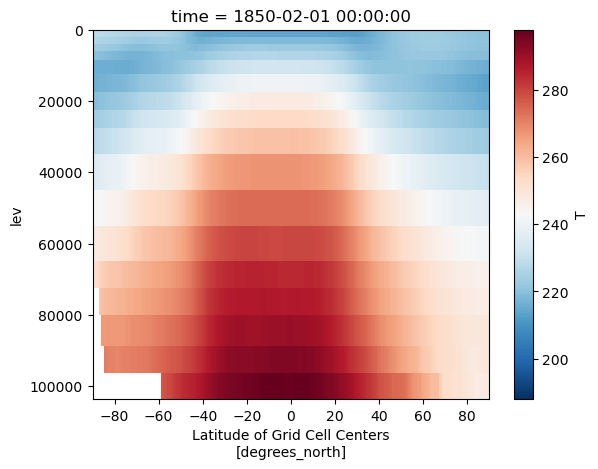

In [15]:
# plot result
dsvr_zonal = dsvr.spatial.average("T", axis=["X"]).squeeze()
dsvr_zonal.T.plot(cmap=plt.cm.RdBu_r)
plt.gca().invert_yaxis()

### 6. Spatial Averaging

Area-weighted spatial averaging is a common technique to reduce dimensionality in geospatial datasets. xCDAT can perform this calculation over full domains or regions of interest.


#### Calculate the spatial average of "TREFHT" and store the results in a Python variable.

- API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xarray.Dataset.spatial.average.html


In [16]:
ds_global = ds.spatial.average("TREFHT")

#### Now let's plot the results.

Note that the spatial averager returns a dataset object so we still need to specify "TREFHT" to plot the dataarray.


Text(0, 0.5, 'Global Mean Temperature [K]')

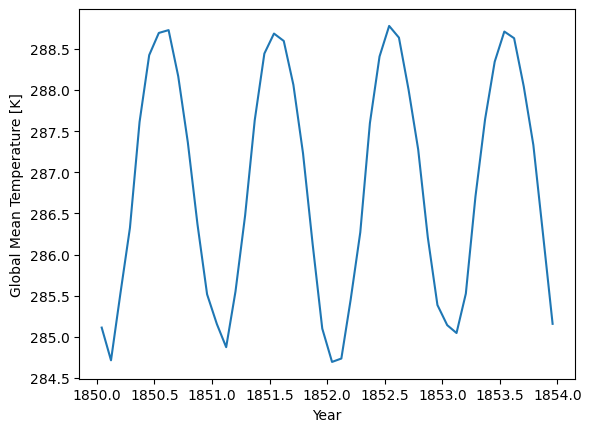

In [17]:
dtime = dt2decimal(ds_global.time)  # decimal time
plt.plot(dtime, ds_global["TREFHT"].values)
plt.xlabel("Year")
plt.ylabel("Global Mean Temperature [K]")

#### Above, we did not specify any constraints. So xCDAT calculated the domain (global) average. Users can also specify their own bounds.


#### Calculate the the average surface temperature (`"TREFHT"`) in the Niño 3.4 region.


API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xarray.Dataset.spatial.average.html


In [18]:
ds_nino34 = ds_xesmf.spatial.average(
    "TREFHT", lat_bounds=(-5, 5), lon_bounds=(190, 240), keep_weights=True
).load()

In this case, we specified `keep_weights=True`. The weights provide full spatial weighting for grid cells entirely within the Niño 3.4 region.

If a grid cell is partially in the Niño 3.4 region, it received partial weight (note we use the 4 x 4 degree grid in this example to show the partial weights and to speed up plotting).

Note that you can also supply your own weights (but you can't automatically subset with `lat_bounds` and `lon_bounds` if you supply your own weights).


#### Plot the Niño 3.4 region time series


Text(0.5, 1.0, 'Nino 3.4 Weights')

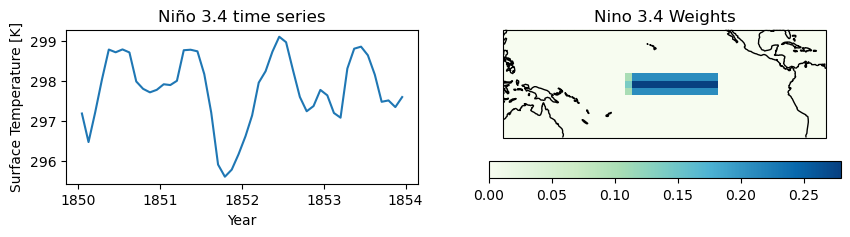

In [19]:
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
plt.plot(dtime, ds_nino34["TREFHT"].values)
plt.xlabel("Year")
plt.ylabel("Surface Temperature [K]")
plt.title("Niño 3.4 time series")

# show the weights
map_proj = ccrs.PlateCarree(central_longitude=180)
ax = plt.subplot(1, 2, 2, projection=map_proj)
plt.pcolor(
    ds_nino34.lon,
    ds_nino34.lat,
    ds_nino34.lat_lon_wts.T,
    transform=ccrs.PlateCarree(),
    cmap=plt.cm.GnBu,
)
ax.set_extent([120, 300, -30, 30], crs=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar(orientation="horizontal")
plt.title("Nino 3.4 Weights")

### 7. Temporal Computations with xCDAT

In the examples below, we will performing temporal computations on the `xarray.Dataset` object using xCDAT.


#### 7.1 Annual cycle

In the global mean time series above, there are large seasonal swings in global temperature. Here we compute the seasonal mean climatology.


#### Calculate the seasonal mean climatology for the `"TREFHT"` variable.


API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xarray.Dataset.temporal.climatology.html


In [20]:
ds_clim = ds.temporal.climatology("TREFHT", freq="season")

#### Now we plot the season means


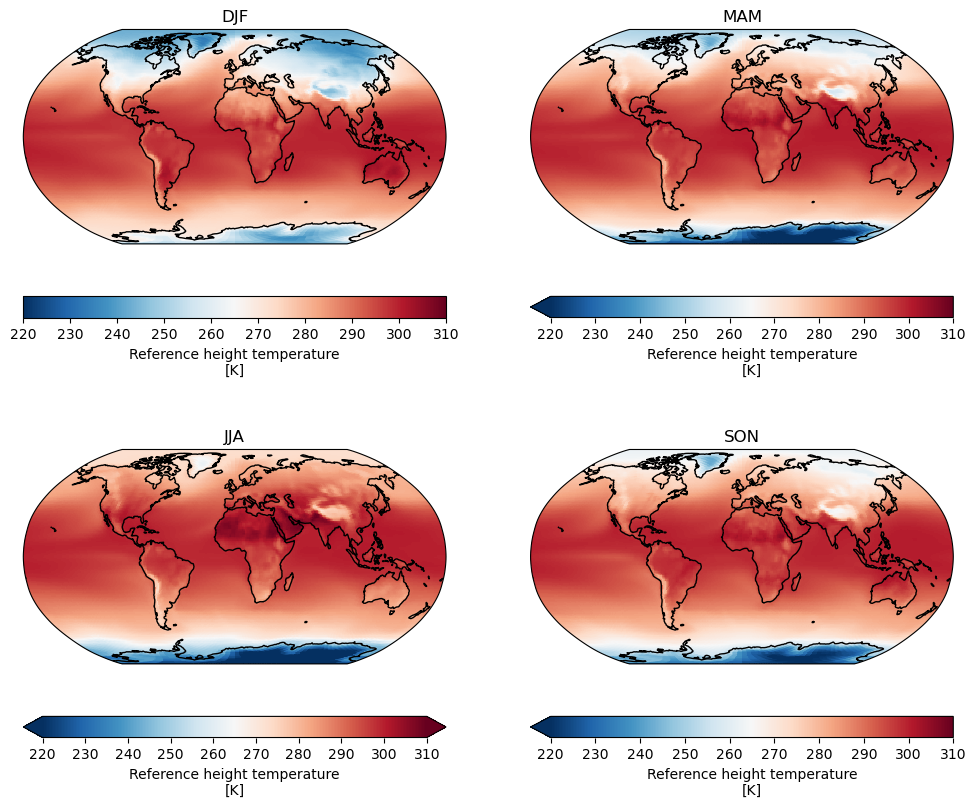

In [21]:
map_proj = ccrs.Robinson()
titles = ["DJF", "MAM", "JJA", "SON"]
plt.figure(figsize=(12, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1, projection=map_proj)
    p = ds_clim.TREFHT[i].plot(
        transform=ccrs.PlateCarree(),
        subplot_kws={"projection": map_proj},
        cbar_kwargs={"orientation": "horizontal"},
        cmap=plt.cm.RdBu_r,
        vmin=220,
        vmax=310,
    )
    ax = plt.gca()
    ax.coastlines()
    plt.title(titles[i])

#### 7.2 Departures

It can also be useful to show the departures from the climatological average.


#### Calculate the seasonal mean climatology for the `"TREFHT"` variable.

In this case, `xcdat` will operate on the global mean time series we calculated above. Note that you can set the climatological reference period (e.g., with `reference_period=("1850-01-01", "1851-12-31")` for historical era departures).


API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xarray.Dataset.temporal.departures.html


In [22]:
ds_global_anomaly = ds_global.temporal.departures(
    "TREFHT", freq="month", reference_period=("1850-01-01", "1851-12-31")
)

#### Now let's plot the departures from the climatological average.


Text(0, 0.5, 'Global Mean Surface Temperature Anomaly [K]')

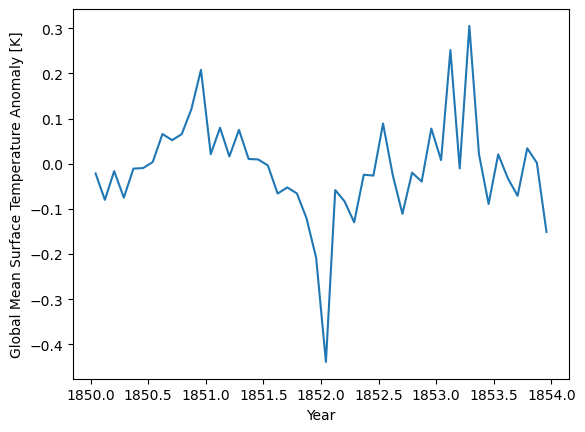

In [23]:
plt.plot(dtime, ds_global_anomaly.TREFHT.values)
plt.xlabel("Year")
plt.ylabel("Global Mean Surface Temperature Anomaly [K]")

#### 7.3 Group averages

`xcdat` also allows you to calculate group averages (e.g., annual or seasonal mean from monthly data or monthly mean from daily data).


#### Calculate the annual mean from anomaly time series.

- API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xarray.Dataset.temporal.group_averages.html


In [24]:
ds_global_anomaly_annual = ds_global_anomaly.temporal.group_average(
    "TREFHT", freq="year"
)

#### Now let's plot the results.


Text(0, 0.5, 'Global Mean Surface Temperature [K]')

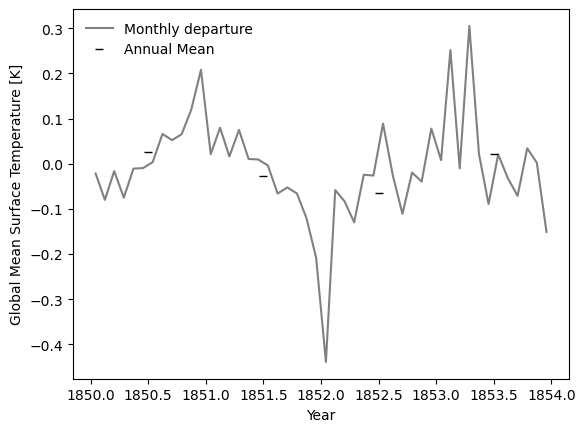

In [25]:
# plot data
dtime_annual = dt2decimal(ds_global_anomaly_annual.time) + 0.5
plt.plot(
    dtime, ds_global_anomaly.TREFHT.values, label="Monthly departure", color="gray"
)
plt.plot(
    dtime_annual,
    ds_global_anomaly_annual.TREFHT.values,
    color="k",
    linestyle="",
    marker="_",
    label="Annual Mean",
)
plt.legend(frameon=False)
plt.xlabel("Year")
plt.ylabel("Global Mean Surface Temperature [K]")

### 8. General Dataset Utilities

xCDAT includes various utilities for data manipulation, including
reorientation of the longitude axis, centering of time coordinates using time bounds, and adding and getting bounds.


#### 8.1 Reorient the longitude axis

Longitude can be represented from 0 to 360 E or as 180 W to 180 E. xcdat allows you to convert between these axes systems.


In [26]:
ds.lon

<xarray.DataArray 'lon' (lon: 360)> Size: 3kB
array([  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5])
Coordinates:
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    long_name:      Longitude of Grid Cell Centers
    standard_name:  longitude
    units:          degrees_east
    axis:           X
    valid_min:      0.0
    valid_max:      360.0
    bounds:         lon_bnds

#### Use `xc.swap_lon_axis` to swap the longitude axis from (0, 360) to (-180, 180) and view

the new longitude axis.

- Documentation: https://xcdat.readthedocs.io/en/stable/generated/xcdat.swap_lon_axis.html


In [27]:
ds2 = xc.swap_lon_axis(ds, to=(-180, 180))

ds2.lon

<xarray.DataArray 'lon' (lon: 360)> Size: 3kB
array([-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5])
Coordinates:
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    long_name:      Longitude of Grid Cell Centers
    standard_name:  longitude
    units:          degrees_east
    axis:           X
    valid_min:      0.0
    valid_max:      360.0
    bounds:         lon_bnds

#### 8.2 Add missing bounds

Bounds are critical to many `xcdat` operations. For example, they are used in determining the weights in spatial or temporal averages and in regridding operations. `add_missing_bounds()` will attempt to produce bounds if they do not exist in the original dataset.

- Documentation: https://xcdat.readthedocs.io/en/stable/generated/xarray.Dataset.bounds.add_missing_bounds.html


In [28]:
# We are dropping the existing bounds to demonstrate adding bounds.
ds4 = ds.drop_vars("time_bnds")

In [29]:
try:
    ds4.bounds.get_bounds("T")
except KeyError as e:
    print(e)

"No bounds data variables were found for the 'T' axis. Make sure the dataset has bound data vars and their names match the 'bounds' attributes found on their related time coordinate variables. Alternatively, you can add bounds with `ds.bounds.add_missing_bounds()` or `ds.bounds.add_bounds()`."


In [30]:
ds5 = ds4.bounds.add_missing_bounds(axes=["T"])
ds5

<xarray.Dataset> Size: 13MB
Dimensions:    (lat: 180, nbnd: 2, lon: 360, time: 48, bnds: 2)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 384B 1850-01-16 12:00:00 ... 1853-12-16 12:00:00
Dimensions without coordinates: nbnd, bnds
Data variables:
    lat_bnds   (lat, nbnd) float64 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, nbnd) float64 6kB dask.array<chunksize=(360, 2), meta=np.ndarray>
    gw         (lat) float64 1kB dask.array<chunksize=(180,), meta=np.ndarray>
    area       (lat, lon) float64 518kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    TREFHT     (time, lat, lon) float32 12MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    time_bnds  (time, bnds) object 768B 1850-01-01 00:00:00 ... 1854-01-01 00...
Attributes: (12/25)
    ne:                30
    fv_nphys:          2
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         32655baa1f
    product:           model-output
    ...                ...
    remap_script:      ncremap
    remap_hostname:    ml-5556678
    remap_version:     5.2.4
    NCO:               netCDF Operators version 5.2.4 (Homepage = http://nco....
    map_file:          remapped/map_ne30pg2_to_cmip6_180x360_aave.20200201.nc
    input_file:        v2.LR.historical_0101.eam.h0.1850-1853/v2.LR.historica...

## Parallelism with Dask

<div style="text-align:center">
  <img src="../../_static/dask-logo.svg" alt="Dask logo" style="display: inline-block; width:300px;">
</div>

> "Nearly all existing xarray methods have been extended to work automatically with Dask arrays for parallelism"

- Parallelized xarray methods include **indexing, computation, concatenating and grouped operations**
- xCDAT APIs that build upon xarray methods inherently support Dask parallelism
- Dask arrays are loaded into memory only when absolutely required (e.g., generating weights for averaging)

&mdash; <cite>https://docs.xarray.dev/en/stable/user-guide/dask.html#using-dask-with-xarray</cite>


The original native format E3SM data is 20 GB and the remapped data is
only ~11 MB.

You won't need to chunk the dataset and parallelize operations
with a dataset this small. This example is simply to show Dask in action.


In [37]:
import xcdat as xc


ds_chunk = xc.open_mfdataset(
    "remapped/v2.LR.historical_0101.eam.h0.*.nc", chunks={"time": 10}
)

In [38]:
ds_chunk.TREFHT

<xarray.DataArray 'TREFHT' (time: 48, lat: 180, lon: 360)> Size: 12MB
dask.array<concatenate, shape=(48, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) object 384B 1850-02-01 00:00:00 ... 1854-01-01 00:00:00
Attributes:
    units:          K
    long_name:      Reference height temperature
    standard_name:  air_temperature
    cell_methods:   time: mean
    cell_measures:  area: area

#### Now let's run the xCDAT `spatial.average()` method and view the output


In [39]:
ds2_avg = ds_chunk.spatial.average("TREFHT")
ds2_avg_res = ds_chunk.compute()

In [40]:
ds2_avg_res.TREFHT

<xarray.DataArray 'TREFHT' (time: 48, lat: 180, lon: 360)> Size: 12MB
array([[[247.8863 , 247.8863 , 247.8863 , ..., 250.7165 , 250.7165 ,
         250.7165 ],
        [249.89389, 249.89232, 249.88916, ..., 251.72891, 251.7305 ,
         251.7313 ],
        [251.32866, 251.32866, 251.32866, ..., 252.45654, 252.45654,
         252.45654],
        ...,
        [249.01143, 249.01143, 249.01143, ..., 246.66348, 246.66348,
         246.66348],
        [249.11923, 249.11935, 249.11958, ..., 246.77803, 246.77779,
         246.77765],
        [249.27008, 249.27008, 249.27008, ..., 246.93741, 246.93741,
         246.93741]],

       [[237.06058, 237.06058, 237.06058, ..., 239.53203, 239.53203,
         239.53203],
        [238.63513, 238.6339 , 238.63144, ..., 240.67648, 240.67828,
         240.67918],
        [239.76044, 239.76044, 239.76044, ..., 241.49902, 241.49902,
         241.49902],
...
        [257.04053, 257.04053, 257.04053, ..., 256.71857, 256.71857,
         256.71857],
        [256.52673, 256.52618, 256.52505, ..., 256.32077, 256.32162,
         256.32208],
        [255.80783, 255.80783, 255.80783, ..., 255.76729, 255.76729,
         255.76729]],

       [[245.71906, 245.71906, 245.71906, ..., 249.42265, 249.42265,
         249.42265],
        [247.1977 , 247.19653, 247.19421, ..., 250.47374, 250.47539,
         250.47621],
        [248.25444, 248.25444, 248.25444, ..., 251.22917, 251.22917,
         251.22917],
        ...,
        [242.92735, 242.92735, 242.92735, ..., 242.2966 , 242.2966 ,
         242.2966 ],
        [242.53412, 242.53369, 242.53282, ..., 241.85774, 241.8587 ,
         241.85919],
        [241.98389, 241.98389, 241.98389, ..., 241.24715, 241.24715,
         241.24715]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) object 384B 1850-02-01 00:00:00 ... 1854-01-01 00:00:00
Attributes:
    units:          K
    long_name:      Reference height temperature
    standard_name:  air_temperature
    cell_methods:   time: mean
    cell_measures:  area: area

### Further Dask Guidance

Visit these pages for more guidance (e.g., when to parallelize):

<div style="text-align: center; margin-top:10px">
    <img src="./images/dask-guide.png" alt="Dask Guide" align=\"center\" style="display: inline-block; width:450px;border: 3px solid #555;">
</div>

- Parallel computing with Dask (xCDAT, show above): https://xcdat.readthedocs.io/en/latest/examples/parallel-computing-with-dask.html
- Parallel computing with Dask (Xarray): https://docs.xarray.dev/en/stable/user-guide/dask.html
- Xarray with Dask Arrays: https://examples.dask.org/xarray.html


<div style="text-align: left; margin-top:10px">
    <img src="../../_static/xcdat-logo.png" alt="xCDAT logo" align=\"center\" style="display: inline-block; width:300px;">
    <h3>Recap of Key Points</h3>
</div>

- xCDAT is an **extension of Xarray for climate data analysis on structured grids**, a modern successor to the Community Data Analysis Tools (CDAT) library
- **Focused on routine climate research analysis operations** including loading, wrangling, averaging, such as temporal averaging, spatial averaging, and regridding
- Designed to encourages **software sustainability and reproducible science**
- **Parallelizable** through Xarray’s support for Dask, which enables efficient processing of large datasets


<div style="text-align: left; margin-top:10px">
    <h3><img src="../../_static/github-logo.png" alt="GitHub logo" align=\"center\" style="display: inline-block; width:200px;">
    <img src="../../_static/github-logo-icon.png" alt="GitHub logo" align=\"center\" style="display: inline-block; width:75px;">
    Get involved and join the xCDAT community!</h3>
</div>

- **Code contributions** are welcome and appreciated
  - GitHub Repository: https://github.com/xCDAT/xcdat
  - Contributing Guide: https://xcdat.readthedocs.io/en/latest/contributing.html
- **Submit and/or address tickets** for feature suggestions, bugs, and documentation updates
  - GitHub Issues: https://github.com/xCDAT/xcdat/issues
- **Participate in forum discussions** on version releases, architecture, feature suggestions, etc.
  - GitHub Discussions: https://github.com/xCDAT/xcdat/discussions
